In [9]:
# -*- coding: utf-8 -*-
"""2024-SVM-1b.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1EPIcKt__xiWYK98k6xnBwxyImj3F6nGp

SVM + PCA

Menggunakan n_components=0.95 pada PCA berarti kita mempertahankan komponen yang cukup untuk menjelaskan 95% dari variansi total dalam data. Ini adalah cara untuk memastikan bahwa kita mempertahankan sebagian besar informasi dari data asli, meskipun kita tidak menentukan jumlah pasti dari komponen.
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/dataset/KepuasanPelanggan.csv'
data = pd.read_csv(url)

# Define features and target variable
X = data.drop('CustomerSatisfaction', axis=1)
y = data['CustomerSatisfaction']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply PCA N=2
#pca = PCA(n_components=2)  # Retain 95% of variance
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

# Create and train the SVM model with RBF kernel and default gamma (scale)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm_rbf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Akurasi Model: {:.2f}%".format(accuracy * 100))
print("\nLaporan Klasifikasi:\n", class_report)
print("Confusion Matriks:\n", conf_matrix)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Akurasi Model: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Confusion Matriks:
 [[16  0]
 [ 0 13]]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


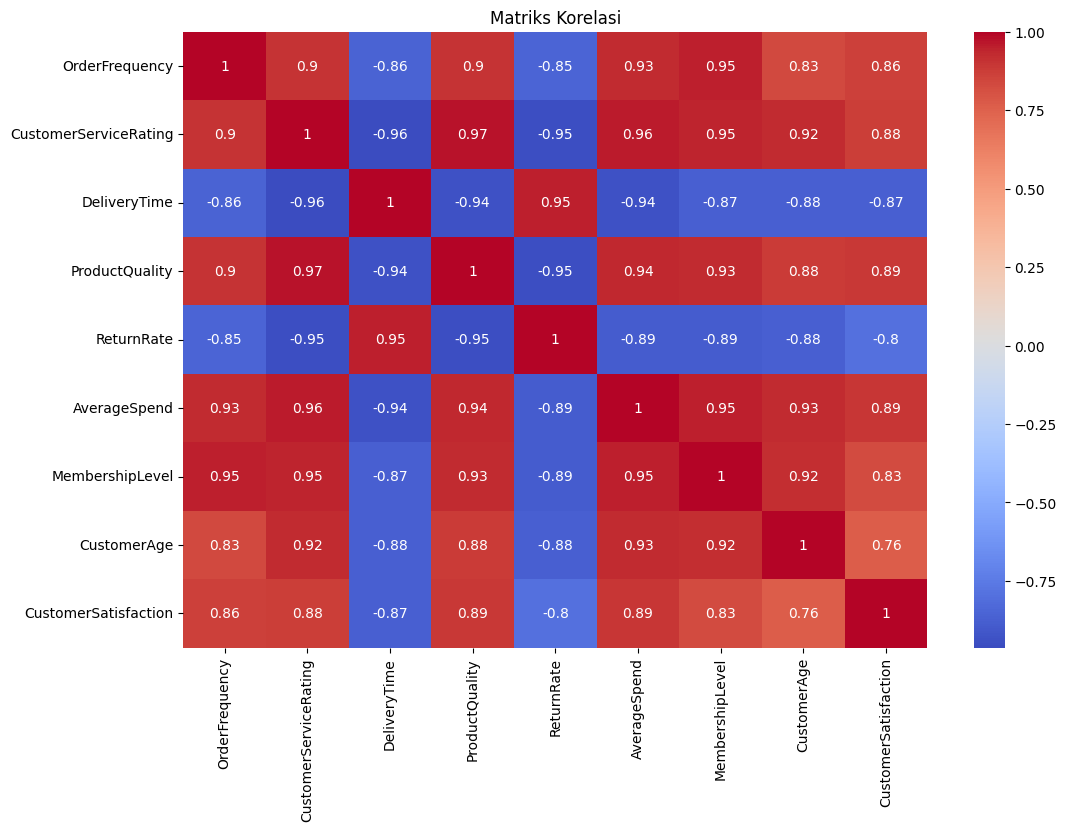

Fitur terpilih berdasarkan korelasi tertinggi terhadap CustomerSatisfaction: ['AverageSpend', 'ProductQuality', 'CustomerServiceRating']
Akurasi Model: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Confusion Matriks :
 [[16  0]
 [ 0 13]]


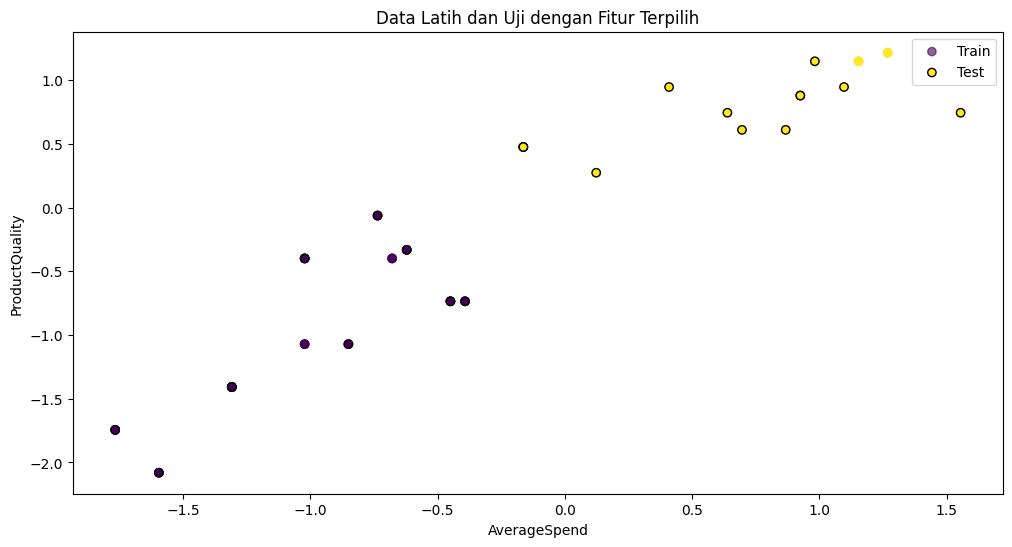

In [10]:
# -*- coding: utf-8 -*-
"""2024-KNN-1c.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1azuY2nbIsUGd725kD9LvrxkkEfgEyLhG
"""

#analisis korelasi pearson untuk memilih fitur yang paling berbobot untuk diimplementasikan pada KNN

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/dataset/KepuasanPelanggan.csv'
data = pd.read_csv(url)

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Tampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Pilih dua fitur dengan korelasi tertinggi terhadap 'CustomerSatisfaction'
target_correlation = correlation_matrix['CustomerSatisfaction'].drop('CustomerSatisfaction')
# top_features = target_correlation.abs().nlargest(2).index.tolist() #2fitur
top_features = target_correlation.abs().nlargest(3).index.tolist()

# Tampilkan fitur terpilih
print(f"Fitur terpilih berdasarkan korelasi tertinggi terhadap CustomerSatisfaction: {top_features}")

# Ekstrak fitur terpilih
X = data[top_features]
y = data['CustomerSatisfaction']

# Bagi dataset menjadi data latih (70%) dan data uji (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Terapkan KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = knn.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Akurasi Model: {:.2f}%".format(accuracy * 100))
print("\nLaporan Klasifikasi:\n", classification_rep)
print("Confusion Matriks :\n", confusion_mat)

# Plot data latih dan data uji
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', label='Test')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Data Latih dan Uji dengan Fitur Terpilih')
plt.legend()
plt.show()
